In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
from IPython.display import Image
from qutip import *
import pickle
import time

import sympy
import numpy as np
from sympy import Sum, summation
from sympy.physics.wigner import wigner_3j
import math
import sys

sys.path.append('..')

In [3]:
with open("EIT_comp_0604.txt","rb") as fp:
    EIT_comp = pickle.load(fp)

In [6]:
rr_scan, sr_scan = [], []

for w0 in range(80,0,-2):
    rr_w0, sr_w0 = [], []
    for i in range(41):
        rr_w0.append(EIT_comp.get('rr'+str(w0))[i][4])
        sr_w0.append(EIT_comp.get('sr'+str(w0))[i][4])
        
    rr_scan.append(rr_w0)
    sr_scan.append(sr_w0)
    
rr_scan = np.array(rr_scan)
sr_scan = np.array(sr_scan)

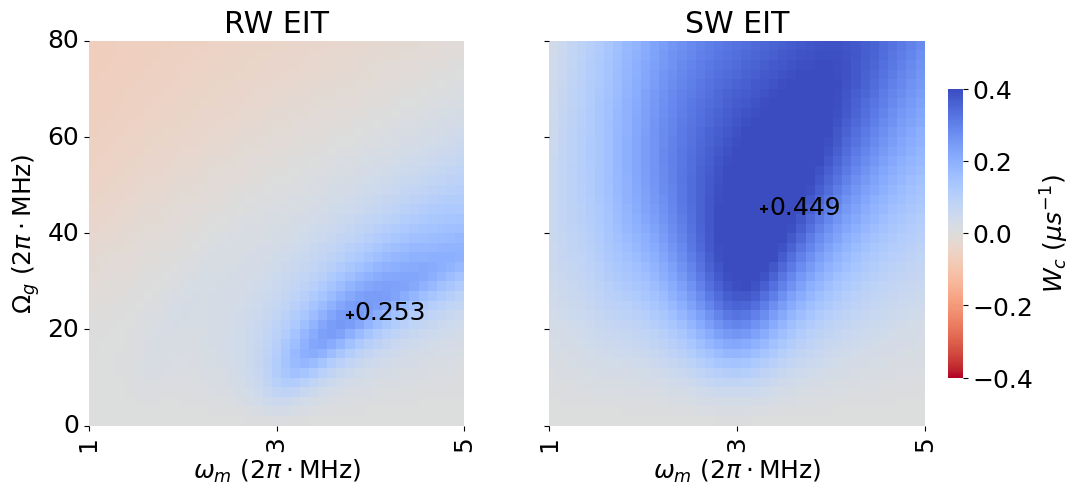

In [10]:
%matplotlib inline
plt.rcParams.update({'font.size':18})
f, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,5), gridspec_kw={'width_ratios': [0.8, 1]})
ax1, ax2 = ax.flatten()

heatmap1 = sns.heatmap(rr_scan, vmin=-0.4, vmax=0.4, cmap= "coolwarm_r", cbar=False, ax=ax1)
ax1.set_ylabel(r'$\Omega_g$ (2$\pi \cdot $MHz)')
ax1.set_title(r'RW EIT')
x, y = np.unravel_index(np.argmax(rr_scan, axis=None), rr_scan.shape)
ax1.scatter(y+0.5, x+0.5, c='black', marker='+')
ax1.text(y+1, x+1, '{0:.3f}'.format(np.max(rr_scan), transform=ax1.transAxes))

sns.heatmap(sr_scan, vmin=-0.4, vmax=0.4, cmap= "coolwarm_r", cbar_kws={"shrink": .75, 'label': r'$W_c$ $(\mu s^{-1})$'}, ax=ax2)
ax2.set_title(r'SW EIT')
x, y = np.unravel_index(np.argmax(sr_scan, axis=None), sr_scan.shape)
ax2.scatter(y+0.5, x+0.5, c='black', marker='+')
ax2.text(y+1, x+1, '{0:.3f}'.format(np.max(sr_scan), transform=ax2.transAxes))

ax1.set_xlabel(r'$\omega_m$ (2$\pi \cdot $MHz)')
ax2.set_xlabel(r'$\omega_m$ (2$\pi \cdot $MHz)')

ax1.set_yticks([0,10,20,30,40],[80, 60, 40, 20, 0])
ax1.set_xticks([0,20.5,41],[1, 3,  5])

In [11]:
with open("EIT_ncomp_0705.txt","rb") as fp:
    EIT_ncomp = pickle.load(fp)

In [13]:
n_rr_scan, n_sr_scan = [], []

for w0 in range(80,0,-2):
    n_rr_w0, n_sr_w0 = [], []
    for i in range(41):
        n_rr_w0.append(EIT_ncomp.get('rr'+str(w0))[i][1])
        n_sr_w0.append(EIT_ncomp.get('sr'+str(w0))[i][1]) 
    n_rr_scan.append(n_rr_w0)
    n_sr_scan.append(n_sr_w0)

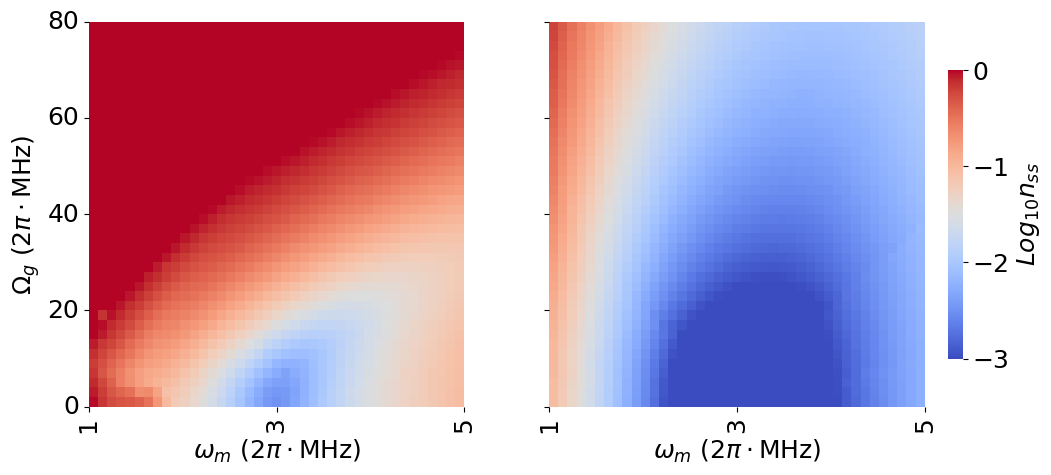

In [14]:
%matplotlib inline
plt.rcParams.update({'font.size':18})
f, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,5), gridspec_kw={'width_ratios': [0.8, 1]})
ax1, ax2 = ax.flatten()

sns.heatmap(np.log(n_rr_scan)/np.log(10), vmin=-3, vmax=0, cmap= "coolwarm", cbar=False, ax=ax1)
ax1.set_ylabel(r'$\Omega_g$ (2$\pi \cdot $MHz)')

sns.heatmap(np.log(n_sr_scan)/np.log(10), vmin=-3, vmax=0, cmap= "coolwarm", cbar_kws={"shrink": .75, 'label': r'$Log_{10} n_{ss}$'}, ax=ax2)

ax1.set_xlabel(r'$\omega_m$ (2$\pi \cdot $MHz)')
ax2.set_xlabel(r'$\omega_m$ (2$\pi \cdot $MHz)')

ax1.set_yticks([0,10,20,30,40],[80, 60, 40, 20, 0])
ax1.set_xticks([0,20.5,41],[1, 3,  5])